# PyEDA

In [3]:
%%capture

!pip install pyeda dd

In [1]:
from pyeda.inter import *
import graphviz
from PIL import Image
import random

ModuleNotFoundError: No module named 'pyeda'

In [ ]:
# 1 = 0001
str_binary = [format(i, '04b') for i in range(1, 5)]

In [ ]:
# 0001 = ~x4 & ~x3 & ~x2 & x1
def convert_binary_str_to_expr(str_binary):
    expr = ['~'*abs(int(str_binary[i])-1) + f'x{i}' for i in range(len(str_binary))]
    return ' & '.join(expr)

In [ ]:
# ~x4 & ~x3 & ~x2 & x1 | ~x4 & ~x3 & x2 & ~x1
def join_exprs(str_binary):
    formulas = []

    for e in str_binary:
        formulas.append( convert_binary_str_to_expr(e) )

    return ' | '.join(formulas)

In [ ]:
expression = join_exprs(str_binary)

In [ ]:
expression

'~x0 & ~x1 & ~x2 & x3 | ~x0 & ~x1 & x2 & ~x3 | ~x0 & ~x1 & x2 & x3 | ~x0 & x1 & ~x2 & ~x3'

In [ ]:
expr(expression)

Or(And(~x0, ~x1, ~x2, x3), And(~x0, ~x1, x2, ~x3), And(~x0, ~x1, x2, x3), And(~x0, x1, ~x2, ~x3))

In [ ]:
bdd_exprs = expr(expression)
bdd = expr2bdd(bdd_exprs)

In [ ]:
bdd_truthtable = expr2truthtable( bdd_exprs )
bdd_truthtable

x3 x2 x1 x0
 0  0  0  0 : 0
 0  0  0  1 : 0
 0  0  1  0 : 1
 0  0  1  1 : 0
 0  1  0  0 : 1
 0  1  0  1 : 0
 0  1  1  0 : 0
 0  1  1  1 : 0
 1  0  0  0 : 1
 1  0  0  1 : 0
 1  0  1  0 : 0
 1  0  1  1 : 0
 1  1  0  0 : 1
 1  1  0  1 : 0
 1  1  1  0 : 0
 1  1  1  1 : 0

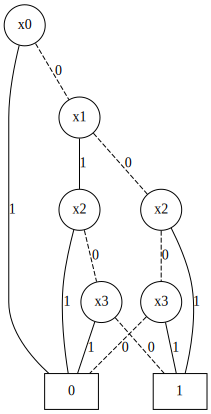

In [ ]:
viz_filename = 'test_pyeda_todot.gv'
viz_format = 'pdf'
bdd_viz = graphviz.Source( bdd.to_dot(), filename=viz_filename, format=viz_format)

# append img format automatically
bdd_viz.render(filename=viz_filename)

bdd_viz 

In [ ]:
!find . -maxdepth 1 -name "*.gv*" -delete

## Experiment

In [ ]:
num_vars = 10 # simulate number of neurons
num_exprs = 30 # simulate number of instances

str_binary = []
for _ in range(num_exprs):
    # pick random number from normal distribuation
    # if > 0 then neuron is active, else not active
    str_binary.append( [random.gauss(0, 1) > 0 for _ in range(num_vars)] )

In [ ]:
expression = join_exprs(str_binary)

In [ ]:
expression[:100]

'x0 & x1 & x2 & ~x3 & ~x4 & x5 & x6 & x7 & ~x8 & x9 | x0 & x1 & ~x2 & ~x3 & ~x4 & x5 & x6 & ~x7 & x8 '

In [ ]:
bdd.inputs

(x0, x1, x2, x3)

In [ ]:
# convert text expresseion to bdd expression
bdd_exprs = expr(expression)

# construct a tree from the expression
bdd = expr2bdd(bdd_exprs)

In [ ]:
# generate truth table
bdd_truthtable = expr2truthtable( bdd )
# bdd_truthtable

In [ ]:
# save bdd representaion
viz_filename = 'test_pyeda.gv'
viz_format = 'pdf'
bdd_viz = graphviz.Source( bdd.to_dot(), filename=viz_filename, format=viz_format)

# img format appended automatically
bdd_viz.render(filename=viz_filename)

'test_pyeda.gv.pdf'

In [ ]:
bdd.satisfy_one()

{x0: 0, x1: 0, x2: 0, x3: 0, x4: 0, x5: 1, x6: 1, x7: 0, x8: 1, x9: 0}

In [ ]:
# get a true expr to test using satisfy_one()
test_true = [v if s else ~v for v, s in zip(bdd.inputs, bdd.satisfy_one().values())]

In [ ]:
test_true

 x5,
 x6,
 x8,

In [ ]:
# test if an expression exist

# bdd.equivalent( expr2bdd( expr(test_true ) ) )
# bdd.equivalent( expr(test_true ) )
# bdd.equivalent( And(*test_true) )
# bdd is And(*test_true)
# And(bdd, And(*test_true)).satisfy_one() is None

{}

In [ ]:
# simulate stream data and test for all generated expressions

num_exprs = 100 # number of test expressions

results = 0
for _ in range(num_exprs):
    # generate text expressions then convert them to bdd
    # test if two bdds are similar 
    # test_expr = expr2bdd( expr( convert_binary_str_to_expr([random.gauss(0, 1) > 0 for _ in range(num_vars)]) ) )

    # generate expression from same bdd variables
    # x0 & x1 & x2 & ~x3 & ~x4 & x5 & x6 & x7 & ~x8 & x9
    test_expr = [x if random.gauss(0, 1) > 0 else ~x for x in bdd.inputs]


    # test expr, +1 if founded
    results += bdd.equivalent( And(*test_expr) ) # add and between vars

print(f'total true: {results} from: {num_exprs}')

total true: 0 from: 100


## [skip] try exprvars function, did not give the intended bdd

In [ ]:
x = exprvars('x', num_vars)

bdd_exprs = []
for _ in range(num_exprs):
    bdd_exprs.append( [v if random.gauss(0, 1) > 0 else ~v for v in x] )

for i, e in enumerate(bdd_exprs):
    bdd_exprs[i] = And(*e)

bdd = Or(*bdd_exprs)

In [ ]:
bdd_truthtable = expr2truthtable( bdd )

In [ ]:
viz_filename = 'test_pyeda_exprvars.gv'
viz_format = 'pdf'
bdd_viz = graphviz.Source( bdd.to_dot(), filename=viz_filename, format=viz_format)

# append img format automatically
bdd_viz.render(filename=viz_filename)

'test_pyeda_exprvars.gv.pdf'

## Test from documentation

In [ ]:
# https://pyeda.readthedocs.io/en/latest/bdd.html?highlight=equivalence#formal-equivalence

a, b, c = map(bddvar, 'abc')
f1 = a ^ b ^ c
f2 = a & ~b & ~c | ~a & b & ~c | ~a & ~b & c | a & b & c

f1.equivalent(f2)

True

In [ ]:
f1 = ~a & b & ~c
f2 = a & ~b & ~c | ~a & b & ~c | ~a & ~b & c | a & b & c

f1.equivalent(f2)

False

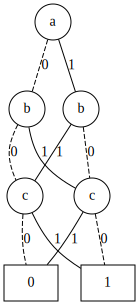

In [ ]:
graphviz.Source( f2.to_dot())

In [ ]:
f1

In [ ]:
f2

In [ ]:
# how expr read text expr
expr('a & ~b & ~c | a & b & ~c | ~a & ~b & c | a & b & c')

Or(And(a, ~b, ~c), And(a, b, ~c), And(~a, ~b, c), And(a, b, c))

In [ ]:
 ~a == expr(0)

False

In [ ]:
a0 = exprvar('a0')
~a0

~a0

In [ ]:
l_vars = [a, b, c]
ll = ['100', '110', '001', '111']
l_expr = []

for l in ll:
    t=[]
    for i, v in zip(l,l_vars):

        if abs(int(i)-1): t.append(~v)
        else: t.append(v)

    l_expr.append(And(*t))
    # l_expr.append(t)

f2 = Or(*l_expr)

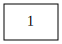

In [ ]:
graphviz.Source( f2.to_dot())

# dd Pakage

## General Example

In [ ]:
from dd.autoref import BDD, Function

In [ ]:
# https://stackoverflow.com/questions/66160582/learning-binary-decision-diagrams-bdds-from-data-in-python
bdd = BDD()

In [ ]:
bdd = BDD()
bdd.declare('x1', 'x2', 'x3')

In [ ]:
# These are the assignments to the input variables
# where the Boolean function is TRUE (the y).
# The assignments where the Boolean function is FALSE
# are not used in the disjunction below.
data = [
    dict(x1=True, x2=False, x3=True),
    dict(x1=True, x2=True, x3=False),
    dict(x1=True, x2=True, x3=True)
]

In [ ]:
u = bdd.false

In [ ]:
for d in data:
    u |= bdd.cube(d)

In [ ]:
[*bdd.pick_iter(u, ['x1', 'x2', 'x3'])]

In [ ]:
bdd.exist(dict(x1=True, x2=False, x3=True), u) == bdd.true

In [ ]:
bdd.dump('dd-BDD.png', roots=[u])

In [ ]:
Image.open('dd-BDD.png', mode='r')

In [ ]:
filename = 'bdd.json'
bdd.dump(filename, roots=[u])

In [ ]:
loaded_bdd = BDD()
roots = loaded_bdd.load(filename)
loaded_bdd.vars

## Experiment

In [ ]:
bdd = BDD()

vars = [f'x{i}' for i in range(10)]
# 1000 vars took 3m 33s

bdd.declare(*vars)

In [ ]:
data = []
for _ in range(30):
    # data.append( {k: bool(round(random.gauss(0, 1),0)) for k in bdd.vars.keys()} )
    data.append( { k: (random.gauss(0, 1)>2) for k in bdd.vars.keys() } )

In [ ]:
u = bdd.false

for d in data:
    u |= bdd.cube(d)

In [ ]:
temp = 0
for _ in range(10_000):
    temp += sum( [(random.gauss(0, 1)>1) for _ in range(10)] )

print(f'AVG true per combination: {temp/10_000:.0f}')

In [ ]:
{ k: (random.gauss(0, 1)>1) for k in bdd.vars.keys() }

In [ ]:
results = []
for i in range(1_000):
    test_expr = { k: (random.gauss(0, 1)>1) for k in bdd.vars.keys() }

    # print(test_expr)
    results.append( bdd.exist(test_expr, u) == bdd.true )

print(f'total true: {sum(results)}')